<a href="https://colab.research.google.com/github/HenriqueCCdA/bootCampAluraDataScience/blob/master/modulo2/desafios/Desafio_aula2_modulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Pre-analise

---
## 1.1) Funções de apoio
---

In [ ]:
def tratamento_dados_pop(pop):
  """
  Trata as tabela da populcao
  -----------------------------------------------------------------------------
  @param pop - Tabela da populacao nao tratada
  ----------------------------------------------------------------------------
  @return Tabela da populacao tratada
  """
  cpop = pop.copy()

  cpop = cpop.dropna()

  cpop["populacao"] = cpop["População"].str.replace(" ", "").astype(int)
  cpop["uf"] = cpop["Unidade federativa"]
  cpop =  cpop[["populacao", "uf"]].set_index("uf")

  cpop.index = cpop.index.str.strip()
  
  return cpop

In [ ]:
def tratamento_dados_gastos(pop):
  """
  Trata as tabela da populcao
  -----------------------------------------------------------------------------
  @param pop - Tabela da populacao nao tratada
  ----------------------------------------------------------------------------
  @return Tabela da populacao tratada
  """
  cpop = pop.copy()

  cpop = cpop.dropna()

  cpop["populacao"] = cpop["População"].str.replace(" ", "").astype(int)
  cpop["uf"] = cpop["Unidade federativa"]
  cpop =  cpop[["populacao", "uf"]].set_index("uf")

  cpop.index = cpop.index.str.strip()

  return cpop

In [ ]:
def tratamento_dados(dados):
  dados_usaveis = dados.select_dtypes(float).drop("Total", axis=1)
  dados_usaveis.index = dados_usaveis.index.str[3:]
  soma = dados_usaveis.sum(axis=1)
  dados_usaveis["Total"] = dados_usaveis.sum(axis=1)

  ordenado_por_total = dados_usaveis.sort_values("Total", ascending=False)
  ordenado_por_total = ordenado_por_total.drop("Total", axis=1)

  return ordenado_por_total

In [ ]:
def gastos_mes_ordenado(mes, ordenado_por_total):
  gastos_do_ultimo_mes = ordenado_por_total[mes]
  return gastos_do_ultimo_mes.sort_values(ascending=False)

---

---
## 1.2) Bibliotecas utilizadas

* searborn
* pandas
* matplotlib
* io
---

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from io import StringIO

# pandas configuracao
pd.options.display.float_format  ="{:,.2f}".format

---

---
## 1.3) Preparação dos dados 
---

In [ ]:
uri = "https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv"

dados = pd.read_csv(uri, 
                    encoding="ISO-8859-1",
                    skiprows = 3, sep=";", 
                    skipfooter=12,
                    thousands=".",
                    decimal=",",
                    engine='python',
                    index_col = "Unidade da Federação")

gastos_ordenado_por_total = tratamento_dados(dados)
gastos_ordenado_por_total.head().iloc[:,[0,1,-2,-1]]

,2007/Ago,2007/Set,2020/Jun,2020/Jul
Unidade da Federação,,,,
São Paulo,"1,665,349.90","4,434,168.64","299,060,851.62","282,709,570.31"
Minas Gerais,"971,394.37","2,861,781.50","135,977,571.87","120,467,187.34"
Paraná,"554,800.22","1,431,708.01","92,901,461.36","80,320,852.69"
Rio Grande do Sul,"1,049,252.33","3,182,913.14","89,019,478.82","78,929,703.81"
Rio de Janeiro,"469,469.34","921,646.57","77,604,925.21","71,540,227.33"


In [ ]:
mes = "2020/Jul"
gastos_2020_Jul = gastos_mes_ordenado(mes, gastos_ordenado_por_total)
gastos_2020_Jul.head()

Unidade da Federação
São Paulo           282,709,570.31
Minas Gerais        120,467,187.34
Paraná               80,320,852.69
Rio Grande do Sul    78,929,703.81
Rio de Janeiro       71,540,227.33
Name: 2020/Jul, dtype: float64

In [ ]:
mes = "2020/Jun"
gastos_2020_Jun = gastos_mes_ordenado(mes, gastos_ordenado_por_total)
gastos_2020_Jun.head()

Unidade da Federação
São Paulo           299,060,851.62
Minas Gerais        135,977,571.87
Paraná               92,901,461.36
Rio Grande do Sul    89,019,478.82
Rio de Janeiro       77,604,925.21
Name: 2020/Jun, dtype: float64

In [ ]:
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	 Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	 Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)
"""

In [ ]:
dados_da_populacao_io = StringIO(dados_da_populacao)
populacao = pd.read_csv(dados_da_populacao_io, sep="\t")

In [ ]:
populacao_tratada = tratamento_dados_pop(populacao)
populacao_tratada.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [ ]:
gastos_e_populacao = populacao_tratada.join(gastos_2020_Jul)
gastos_e_populacao.head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,"282,709,570.31"
Minas Gerais,21292666,"120,467,187.34"
Rio de Janeiro,17366189,"71,540,227.33"
Bahia,14930634,"58,898,100.40"
Paraná,11516840,"80,320,852.69"


In [ ]:
gastos_e_populacao_por_habitantes = gastos_e_populacao.copy()
gastos_e_populacao_por_habitantes['2020/Jul'] = gastos_e_populacao_por_habitantes['2020/Jul'] / gastos_e_populacao_por_habitantes['populacao']
gastos_e_populacao_por_habitantes.head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,6.11
Minas Gerais,21292666,5.66
Rio de Janeiro,17366189,4.12
Bahia,14930634,3.94
Paraná,11516840,6.97


# 2) Desafios

---
## 2.1) Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.
---



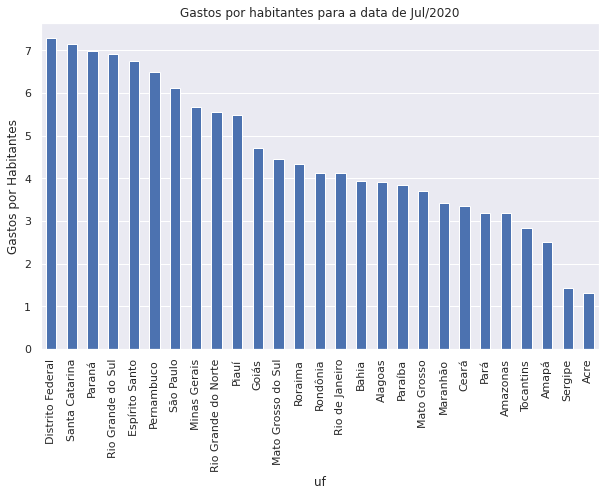

In [ ]:
gastos_e_populacao_por_habitantes['2020/Jul'].sort_values(ascending=False).plot(kind='bar', 
                                                   figsize=(10,6),
                                                   ylabel = "Gastos por Habitantes",
                                                   title = "Gastos por habitantes para a data de Jul/2020")

plt.grid(axis='x')

---
## 2.2) Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.
---

In [ ]:
gastos_e_populacao_todos_os_meses = populacao_tratada.join(gastos_ordenado_por_total)
gastos_e_populacao_todos_os_meses.head().iloc[:, [0,1,2,-2,-1]]

,populacao,2007/Ago,2007/Set,2020/Jun,2020/Jul
uf,,,,,
São Paulo,46289333,"1,665,349.90","4,434,168.64","299,060,851.62","282,709,570.31"
Minas Gerais,21292666,"971,394.37","2,861,781.50","135,977,571.87","120,467,187.34"
Rio de Janeiro,17366189,"469,469.34","921,646.57","77,604,925.21","71,540,227.33"
Bahia,14930634,"135,146.36","448,349.75","65,159,300.63","58,898,100.40"
Paraná,11516840,"554,800.22","1,431,708.01","92,901,461.36","80,320,852.69"


In [ ]:
gastos_e_populacao_por_habitantes_todos_os_meses = gastos_e_populacao_todos_os_meses.copy()
for column in gastos_e_populacao_por_habitantes_todos_os_meses.columns[1:]:
  gastos_e_populacao_por_habitantes_todos_os_meses[column] = gastos_e_populacao_por_habitantes_todos_os_meses[column]/gastos_e_populacao_por_habitantes_todos_os_meses['populacao']

gastos_e_populacao_por_habitantes_todos_os_meses['populacao'] = gastos_e_populacao_por_habitantes_todos_os_meses['populacao']/ 1000000 
gastos_e_populacao_por_habitantes_todos_os_meses.head().iloc[:, [0,1,2,-2,-1]]

,populacao,2007/Ago,2007/Set,2020/Jun,2020/Jul
uf,,,,,
São Paulo,46.29,0.04,0.10,6.46,6.11
Minas Gerais,21.29,0.05,0.13,6.39,5.66
Rio de Janeiro,17.37,0.03,0.05,4.47,4.12
Bahia,14.93,0.01,0.03,4.36,3.94
Paraná,11.52,0.05,0.12,8.07,6.97


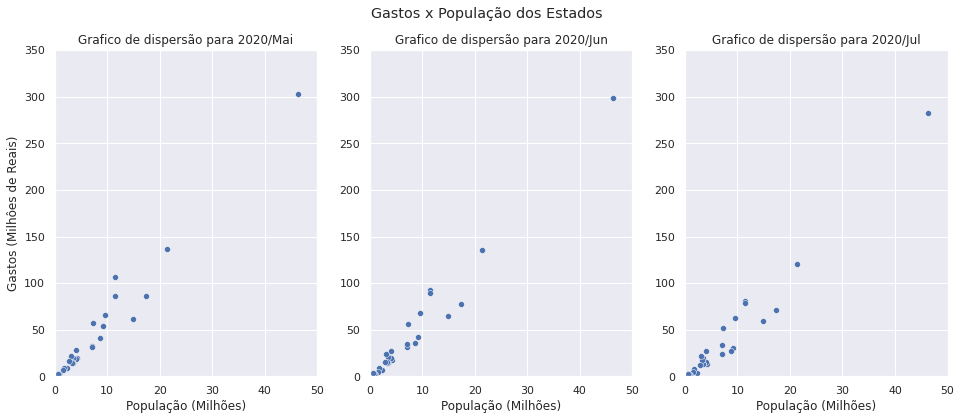

In [ ]:
sns.set(rc={'figure.figsize':(16,6)})

fig, ax = plt.subplots(nrows=1, ncols=3)

fig.suptitle(t = f"Gastos x População dos Estados")

dados = gastos_e_populacao_todos_os_meses.copy()/1000000

for i, mes in enumerate(['2020/Mai','2020/Jun', '2020/Jul']):
  sns.scatterplot(ax = ax[i],
                  data=dados,
                  x = "populacao", 
                  y = mes)
  
  ax[i].set(xlabel= "População (Milhões)",         
         title = f"Grafico de dispersão para {mes}",
         xlim=(0,50),
         ylim=(0,350))

#
ax[0].set( ylabel="Gastos (Milhôes de Reais)")
ax[1].set( ylabel=None)
ax[2].set( ylabel=None)
 
plt.show()

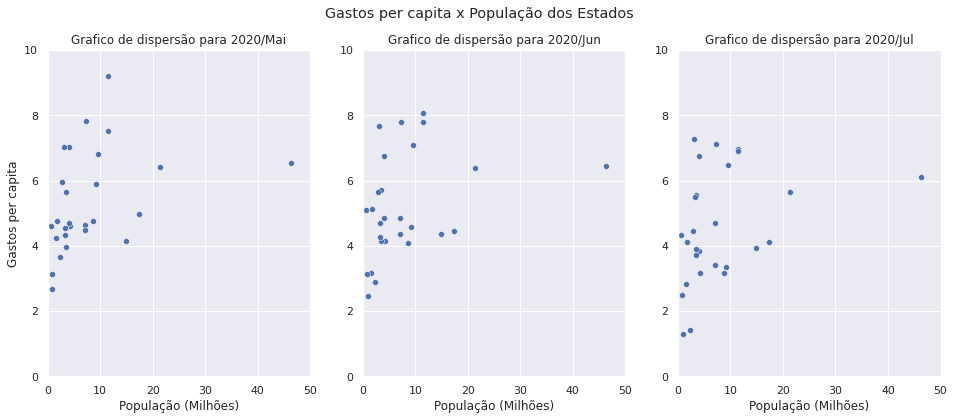

In [ ]:
sns.set(rc={'figure.figsize':(16,6)})

fig, ax = plt.subplots(nrows=1, ncols=3)

fig.suptitle(t = f"Gastos per capita x População dos Estados")

dados = gastos_e_populacao_por_habitantes_todos_os_meses

for i, mes in enumerate(['2020/Mai','2020/Jun', '2020/Jul']):
  sns.scatterplot(ax = ax[i],
                  data=dados,
                  x = "populacao", 
                  y = mes)
  
  ax[i].set(xlabel= "População (Milhões)",         
         title = f"Grafico de dispersão para {mes}",
         xlim=(0,50),
         ylim=(0,10))

#
ax[0].set( ylabel= "Gastos per capita")
ax[1].set( ylabel=None)
ax[2].set( ylabel=None)
 
plt.show()

> A comparação dos gráficos desta forma é bastante dificil. Uma melhor abordagem é botar todos eles no mesmo grafico.

---

## 2.3) Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês corrente, analisar e compartilhar suas hipóteses.

---

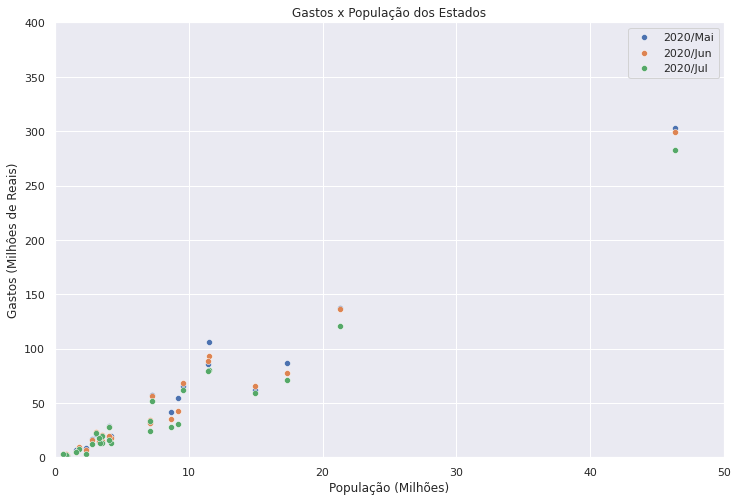

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})

dados = gastos_e_populacao_todos_os_meses.copy()/1000000

for i, mes in enumerate(['2020/Mai','2020/Jun', '2020/Jul']):
  ax = sns.scatterplot(data=dados,
                       x = "populacao",
                       y = mes,
                       label = mes)

ax.set(xlabel= "População (Milhões)",         
      title = f"Gastos x População dos Estados",
      ylabel= "Gastos (Milhôes de Reais)",
      xlim=(0,50),
      ylim=(0,400))

plt.show()

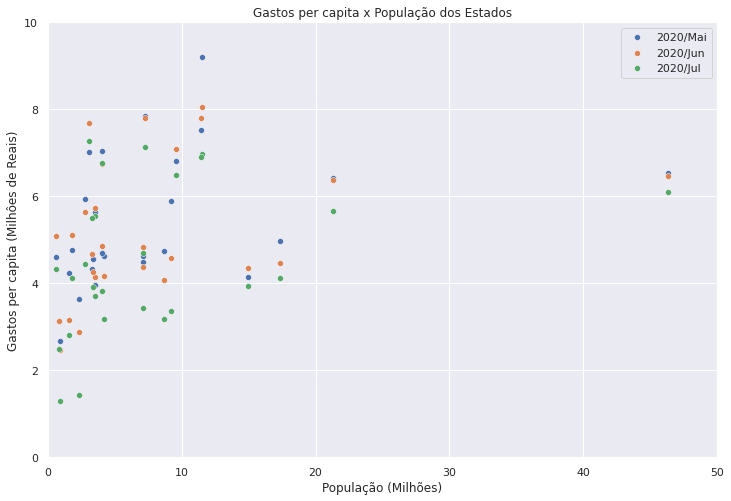

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})

dados = gastos_e_populacao_por_habitantes_todos_os_meses

for i, mes in enumerate(['2020/Mai','2020/Jun', '2020/Jul']):
  ax = sns.scatterplot(data=dados,
                       x = "populacao",
                       y = mes,
                       label = mes)

ax.set(xlabel= "População (Milhões)",         
      title = f"Gastos per capita x População dos Estados",
      ylabel= "Gastos per capita (Milhôes de Reais)",
      xlim=(0,50),
      ylim=(0,10))

plt.show()

> Nesse gráficos é possivel que existe uma diferença entre os gastos dos meses.

---
## 2.4) Desafio 04 (Próximo Vídeo): Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.
---